# №1

In [ ]:
import numpy as np
from scipy import optimize
from scipy.optimize import minimize

In [ ]:
def dist(z1, z2):
  r = ((z1[0] - z2[0])**2 + (z1[1] - z2[1]) ** 2) ** (1/2)
  return r

def fourdist(x, z1, z2, z3, z4):
  return (dist(z1, x)**2 + dist(z2, x)**2 + dist(z3, x)**2 + dist(z4, x)**2)


def R(r, x, z1, z2, z3, z4):
  return((dist(z1, x)-r)**2 + (dist(z2, x)-r)**2 + (dist(z3, x)-r)**2 + (dist(z4, x)-r)**2)

def CR(z1, z2, z3, z4):
  res = minimize(fourdist,[0, 0], args=(z1, z2, z3, z4))
  C = res.x
  resr = minimize(R, 1, args=(C, z1, z2, z3, z4))
  r = resr.x
  print(C)
  print(r)



In [ ]:
z1=[1,1]
z2=[-1,-1]
z3=[-1,1]
z4=[1,-1]
CR(z1, z2, z3, z4)


[0. 0.]
[1.41421356]


# №2

Найдем, вблизи каких значений искать корни уравнения методом Ньютона:

Приравняем вторую производную к 0, решим квадратное уравнение $12 x^2-66 x +18 = 0$:
$$
x_1 = \frac{11-\sqrt{57}}{4} \approx 0.29
$$

$$
x_2 = \frac{11+\sqrt{57}}{4} \approx 5.21
$$

Корни первой производной будут лежать между этих чисел, найдем их:

In [ ]:
def f(x):
  return (x**4-11*x**3+9*x**2+11*x-10)    

def fprime(x):
  return (4*x**3 - 33*x**2 + 18*x + 11)


z=[0, 1, 5.5]
rootfprime = optimize.newton(fprime, z, fprime=lambda x: 12*x**2 - 66*x + 18) 
print(rootfprime)

[-0.36130468  1.          7.61130468]


Будем искать корни уравнения между найденных корней производной:

In [ ]:
z=[-0.5, 0.5, 1.5, 8]
root=optimize.newton(f, z, fprime)
print(root)

[-1.  1.  1. 10.]


Область притяжения:

In [ ]:
n = 200
z = 10
z_i = z
z_n = z

while z_n == 10:
  z_i -= 0.1
  z_n = z_i
  for i in range(n):
    z_n = z_n - f(z_n)/fprime(z_n)
    i+=1

print(z_i)

7.6000000000000085


Точки пересечения окружностей $x^2+y^2=100$; $(x-10)^2 + y^2 = (10-7.6)^2$: $$
(x,y) = (\frac{1214}{125}, \pm \frac{24 \sqrt{154}}{125}).
$$

Площадь сектора: $s = \pi (10-7.6)^2 \cdot 2 \cdot arctg(\frac{2\sqrt{154}}{3})$

In [ ]:
S = 3.14*10**2
s = 3.14*(10-z_i)**2 * 2.9
print(s/S)

0.16703999999999883


# №4

In [ ]:
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from numpy.linalg import svd

[0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

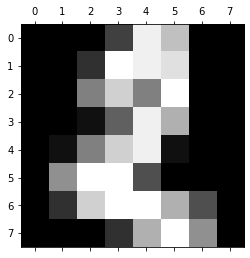

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

A = digits.data
y = digits.target

print(y)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[2])

plt.show()

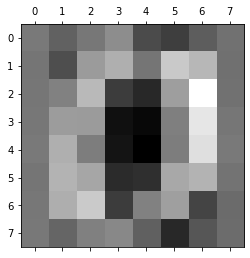

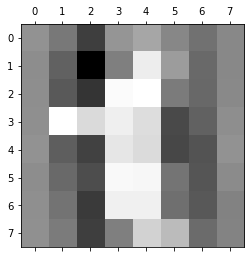

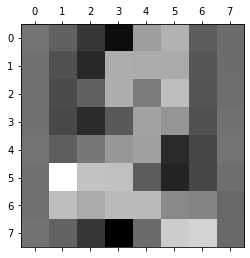

In [ ]:
from sklearn.preprocessing import StandardScaler
A_std = StandardScaler().fit_transform(A)      
for i in range(3):
    B = A_std[i,:].reshape((8,8))
    plt.matshow(B) 
    plt.show() 

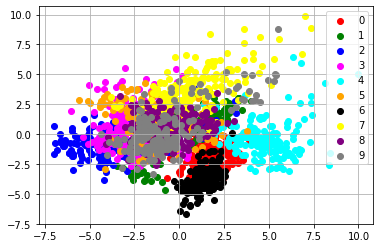

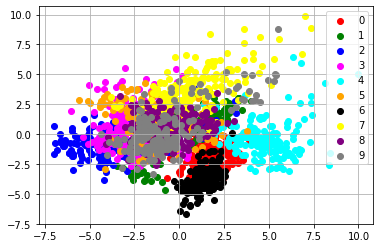

In [ ]:
numbers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]        
colors = ['red', 'green', 'blue', 'magenta', 'cyan', 'orange', 'black', 'yellow', 'purple', 'gray']

rank = 2
def inspect_projections(rank):
  u, s, wh = np.linalg.svd(A_std)
  projections = u[:,:rank] @ np.diag(s[:rank])
  for number, color in zip(numbers, colors):
        plt.scatter(projections[y==number, 0],
                    projections[y==number, 1],
                    label = number,
                    c = color)
  plt.legend(loc='best')
  plt.grid()
  plt.show()

inspect_projections(2)
inspect_projections(60)

# №5

In [ ]:
head = np.array([0.5, 0.4])

def full(p_true, head):
  return(p_true[0] * head[0] + p_true[1] * head[1])

def prob(k, head, m):
  prob = np.array([0.5, 0.5])
  tail = np.array([1,1]) - np.array(head)
  for i in range(m):  
    if k[i] == 1:
      prob = head*prob/full(prob, head) #Байес
    
    elif k[i] == 0:
      prob = tail*prob /full(prob, tail)
  return prob

In [ ]:
m = 2
k = [1, 0]

prob(k, head, m)

array([0.51020408, 0.48979592])

In [ ]:
def search(k, head, m):
  if prob(k, head, m)[0] > prob(k, head, m)[1]:
    p = 1 #настоящая 
  
  elif prob(k, head, m)[0] < prob(k, head, m)[1]:
    p = 0 #шулерская

  return p

In [ ]:
search([0, 1, 0, 0, 0], [0.5, 0.4], 5)

0

In [ ]:
#шулерские

def false_coins(n, m):
  y_pred_f = np.array([])
  for i in range(n):
    toss_ups = np.random.choice([0,1], size=m, p=[0.6, 0.4])
    y_pred_f = np.append(y_pred_f, search(toss_ups, head, m))
    i+=1
  return y_pred_f

#настоящие

def true_coins(n, m):
  y_pred_t = np.array([])
  for i in range(n):
    toss_ups = np.random.choice([0,1], size=m, p=[0.5, 0.5])
    y_pred_t = np.append(y_pred_t, search(toss_ups, head, m))
    i+=1
  return y_pred_t



In [ ]:
from sklearn.metrics import confusion_matrix

n = 5
y_pred = np.concatenate([true_coins(n, m), false_coins(n, m)])
y_actu = np.ones(2*n)
y_actu[n:] = 0
print(y_actu, y_pred)
conf_m = confusion_matrix(y_actu, y_pred)
conf_m / conf_m.astype(np.float64).sum(axis=1)

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.] [1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]


array([[0.2, 0.8],
       [0.4, 0.6]])

In [ ]:
P = conf_m[0,0] + conf_m[1,0]
N = conf_m[0,1] + conf_m[1,1]
TP = conf_m[0,0]
FP = conf_m[0,1]
FN = conf_m[1,0]
TN = conf_m[1,1]


accuracy = (TP + TN)/(P+N)
error_rate = 1-accuracy
FPR = FP/N
TPR = TP/P
precision = TP/(TP+FP)
recall = TP/P
F_measure = 2/(1/precision + 1/recall)

F_measure 

0.25

In [ ]:
def conf_matr(n, m):
  y_pred = np.concatenate([true_coins(n, m), false_coins(n, m)])
  y_actu = np.ones(2*n)
  y_actu[n:] = 0

  c = confusion_matrix(y_actu, y_pred)
  return c


In [ ]:
def F_measure(n, m):
  TP = conf_matr(n, m)[0,0]
  FP = conf_matr(n, m)[0,1]
  FN = conf_matr(n, m)[1,0]
  TN = conf_matr(n, m)[1,1]
  P = TP + FN
  N = TN + FP

  precision = TP/(TP+FP)
  recall = TP/P
  F_measure = 2/(1/precision + 1/recall)
  return F_measure


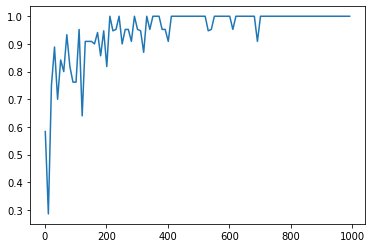

In [ ]:
x = np.arange(1, 1000, 10)
y = []
n = 10
for i in range(100):
  m = x[i]
  y.append(F_measure(n, int(m)))
plt.plot(x, y)
plt.show()

# №3

Приблизим с помощью SVD. Видим, что ошибка уменьшается, когда ранг приближенной приближается к рангу исходной. (Взяла за А матрицу из 4 задачи)

In [ ]:
print(np.linalg.matrix_rank(A))
A_std = StandardScaler().fit_transform(A)
rank_std = np.linalg.matrix_rank(A_std)
u, s, vh = np.linalg.svd(A_std)
print('rank_std =', rank_std)
for rank in range(55, rank_std+1):
  Ar = u[:,:rank] @ np.diag(s[:rank]) @ vh[:rank,:]
  err = np.linalg.norm(A_std - Ar)/np.linalg.norm(A_std)
  print("rank =", rank,"error =", err)

61
rank_std = 61
rank = 55 error = 0.08691655393736734
rank = 56 error = 0.07708519135203608
rank = 57 error = 0.06681691241533934
rank = 58 error = 0.055797093753602
rank = 59 error = 0.043154469599048714
rank = 60 error = 0.0287289217482666
rank = 61 error = 2.266620322270403e-15


Получаем, что К равен рангу матрицы, а векторы - правые и левые сингулярные векторы.

In [ ]:
print(u, vh.T)

[[ 1.66666366e-02 -9.32362498e-03  4.10144768e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.12812196e-03  9.03189445e-03 -4.07932970e-02 ... -6.98531518e-03
  -1.04864722e-02 -3.18436489e-03]
 [ 1.13365672e-02 -3.09831829e-03 -3.14240558e-02 ... -1.86748751e-02
  -1.51100027e-02  2.29663565e-02]
 ...
 [ 8.90351798e-03 -1.44480169e-03 -2.56725249e-02 ...  9.72210173e-01
  -1.21463606e-05 -1.27490658e-02]
 [ 9.36897569e-03 -3.72071369e-03  2.55219521e-02 ...  7.34922199e-04
   9.71177605e-01  7.74618521e-04]
 [-1.09505371e-02 -2.17592328e-02 -2.94798452e-03 ... -1.11317553e-02
   4.66200063e-04  9.63814412e-01]] [[ 1.21482737e-18 -7.62433540e-19  3.56880226e-18 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.82233917e-01  4.70270076e-02 -2.35882143e-02 ... -1.14403068e-16
  -4.51821722e-17 -2.83191000e-18]
 [-2.85867997e-01  5.95647953e-02  5.67987457e-02 ...  9.02488486e-17
  -1.77307337e-16  5.03596637e-18]
 ...
 [-1.03198001e-01 -2.42617777e-01  2.2279524